In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
def sigmoid(x):
    s=1/(1+np.exp(-x))
    ds=s*(1-s)  
    return s,ds
x=np.arange(-5,5,0.01)
sigmoid(x)

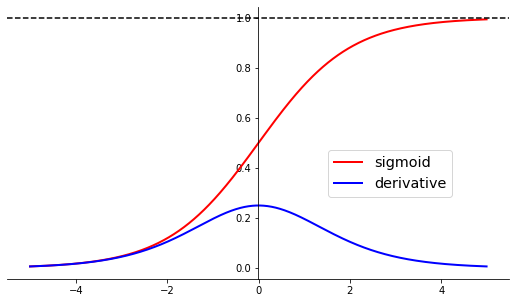

In [23]:


# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# ax.set_ylabel('Example', fontsize=40)
# Create and show plot
ax.plot(x,sigmoid(x)[0], color="r", linewidth=2, label="sigmoid")
ax.plot(x,sigmoid(x)[1], color="b", linewidth=2, label="derivative")
ax.axhline(y=1.0, xmin=0.0, xmax=1.0, color='k',linestyle = '--' )
# ax.legend(loc="center right", frameon=False)
ax.legend(bbox_to_anchor=(0.9, 0.5), fontsize = 'x-large')
fig.show()
plt.savefig('/content/gdrive/My Drive/images/sigmoid.png')

In [37]:
def tanh(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    dt=1-t**2
    return t,dt


In [38]:
z=np.arange(-5,5,0.01)
tanh(z)[0].size,tanh(z)[1].size
# print(z)

(1000, 1000)

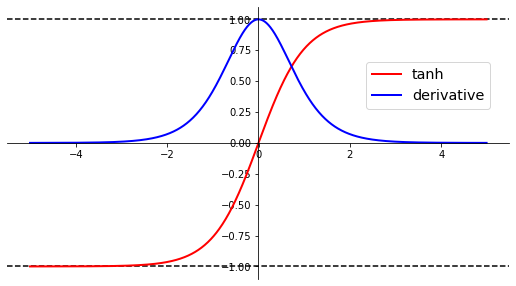

In [39]:

# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.axhline(y=1.0, xmin=0.0, xmax=1.0, color='k',linestyle = '--' )
ax.axhline(y=-1.0, xmin=0.0, xmax=1.0, color='k',linestyle = '--' )
ax.plot(z,tanh(z)[0], color="r", linewidth=2, label="tanh")
ax.plot(z,tanh(z)[1], color="b", linewidth=2, label="derivative")
ax.legend(bbox_to_anchor=(0.7, 0.6), fontsize = 'x-large')
fig.show()
plt.savefig('/content/gdrive/My Drive/images/tanh.png')

In [24]:
def relu(x):
    r = np.maximum(0,x)
    # if x > 0:
    #   dt = 1
    # elif x <= 0:
    #   dt = 0
    # dt=1-t**2
    return r

In [25]:
def relu_d(x):

    if x > 0:
      return 1
    elif x <= 0:
      return 0 
    # dt=1-t**2
    # return dt

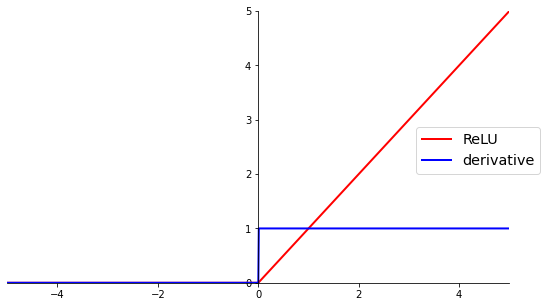

In [40]:
r=np.arange(-5,5,0.01)
fig, ax = plt.subplots(figsize=(9, 5))
ax.set_ylim([0, 5.0])
ax.set_xlim([-5.0, 5.0])
# ax.axvline(0, color='k')

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
# ax.axhline(y=1.0, xmin=0.0, xmax=1.0, color='k',linestyle = '--' )
# ax.axhline(y=-1.0, xmin=0.0, xmax=1.0, color='k',linestyle = '--' )
ax.plot(r,relu(r), color="r", linewidth=2, label="ReLU")
# ax.plot(r,relu_d(r), color="b", linewidth=2, label="derivative")
ax.plot(r, list(map(lambda r: relu_d(r),r)), color="b", linewidth=2,label="derivative")
ax.legend(bbox_to_anchor=(0.8, 0.6), fontsize = 'x-large')
fig.show()
plt.savefig('/content/gdrive/My Drive/images/relu.png')

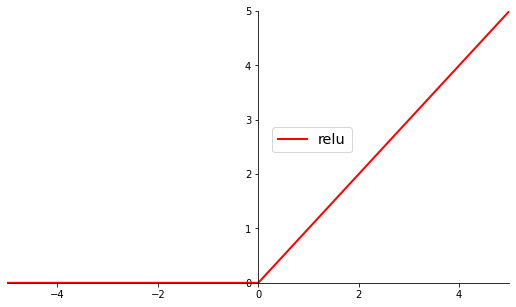

In [21]:


fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(111)
# ax.plot(r,relu(r), color="r", linewidth=2, label="relu")
# ax.plot(r,relu_d(r), color="b", linewidth=2, label="derivative")
ax.set_ylim([0, 5.0])
ax.set_xlim([-5.0, 5.0])
# ax.axvline(0, color='k')

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.legend(bbox_to_anchor=(0.7, 0.6), fontsize = 'x-large')
ax.grid(False)
# ax.set_xlabel('z')
# ax.set_title('Rectified linear unit')

fig.show()
plt.savefig('/content/gdrive/My Drive/images/relu.png')

In [ ]:
def softmax(x):
    """
    对输入x的每一行计算softmax。

    该函数对于输入是向量（将向量视为单独的行）或者矩阵（M x N）均适用。
    
    代码利用softmax函数的性质: softmax(x) = softmax(x + c)

    参数:
    x -- 一个N维向量，或者M x N维numpy矩阵.

    返回值:
    x -- 在函数内部处理后的x
    """
    orig_shape = x.shape

    # 根据输入类型是矩阵还是向量分别计算softmax
    if len(x.shape) > 1:
        # 矩阵
        tmp = np.max(x,axis=1) # 得到每行的最大值，用于缩放每行的元素，避免溢出
        x -= tmp.reshape((x.shape[0],1)) # 利用性质缩放元素
        x = np.exp(x) # 计算所有值的指数
        tmp = np.sum(x, axis = 1) # 每行求和        
        x /= tmp.reshape((x.shape[0], 1)) # 求softmax
    else:
        # 向量
        tmp = np.max(x) # 得到最大值
        x -= tmp # 利用最大值缩放数据
        x = np.exp(x) # 对所有元素求指数        
        tmp = np.sum(x) # 求元素和
        x /= tmp # 求somftmax
    return x

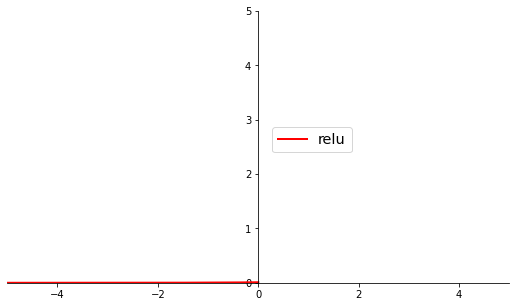

In [ ]:
s=np.arange(-5,5,0.01)


fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(111)
ax.plot(s,softmax(s), color="r", linewidth=2, label="relu")
# ax.plot(s,tf.nn.softmax(logits = s), color="r", linewidth=2, label="relu")
ax.set_ylim([0, 5.0])
ax.set_xlim([-5.0, 5.0])
# ax.axvline(0, color='k')

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.legend(bbox_to_anchor=(0.7, 0.6), fontsize = 'x-large')
ax.grid(False)
# ax.set_xlabel('z')
# ax.set_title('Rectified linear unit')

plt.show()